<h1 style="text-align: center;">Deep Learning<br><br>Session - 4<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

# Keras Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer["target_names"])

['malignant' 'benign']


In [7]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [10]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [11]:
frames = [df_feat, df_target]
df = pd.concat(frames,axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [12]:
df.shape

(569, 31)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [15]:
df.Cancer.value_counts()

1    357
0    212
Name: Cancer, dtype: int64

<AxesSubplot:xlabel='Cancer', ylabel='count'>

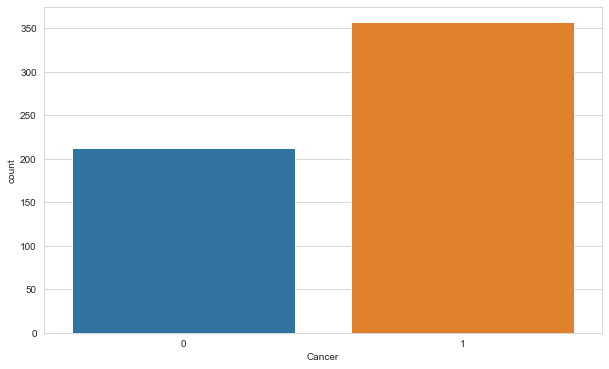

In [16]:
sns.countplot(df["Cancer"])

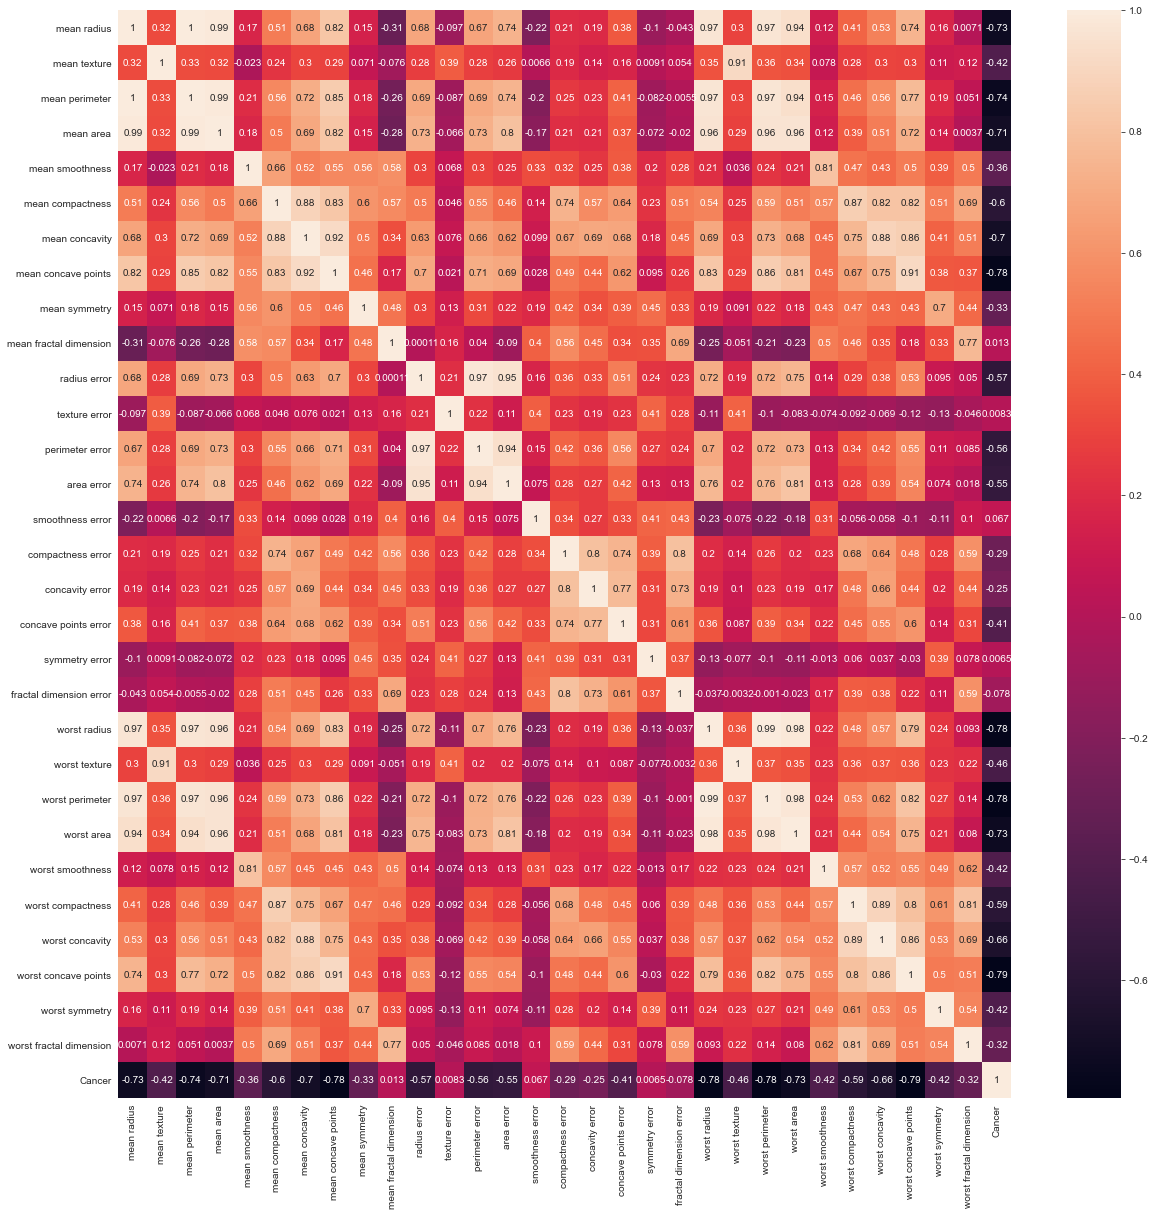

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [18]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

In [19]:
df=df.drop(drop_list, axis=1)

In [20]:
df.shape

(569, 25)

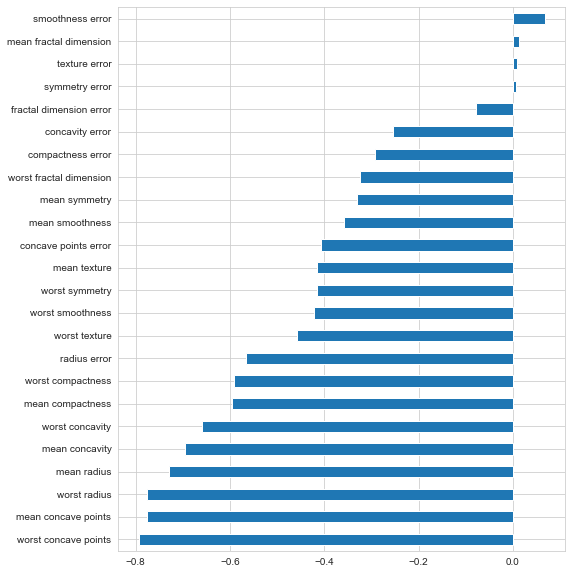

In [21]:
plt.figure(figsize = (8,10))
df.corr()['Cancer'].sort_values().drop("Cancer").plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
X = df.drop('Cancer', axis=1)
y = df['Cancer']

In [24]:
seed = 42

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [29]:
X_train.shape

(512, 24)

In [30]:
X_test.shape

(57, 24)

In [31]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [32]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
15/15 [==============================] - 1s 16ms/step - loss: 0.6778 - accuracy: 0.7674 - val_loss: 0.6622 - val_accuracy: 0.9038
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.8326 - val_loss: 0.6296 - val_accuracy: 0.9038
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6204 - accuracy: 0.8457 - val_loss: 0.5931 - val_accuracy: 0.9231
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.8717 - val_loss: 0.5448 - val_accuracy: 0.9423
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.8761 - val_loss: 0.4792 - val_accuracy: 0.9423
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.8870 - val_loss: 0.4088 - val_accuracy: 0.9423
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8957 - val_loss: 0.3341 - val_accuracy: 0.9423
Epoch

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                900       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.678,0.767,0.662,0.904
1,0.652,0.833,0.630,0.904
2,0.620,0.846,0.593,0.923
3,0.581,0.872,0.545,0.942
4,0.528,0.876,0.479,0.942


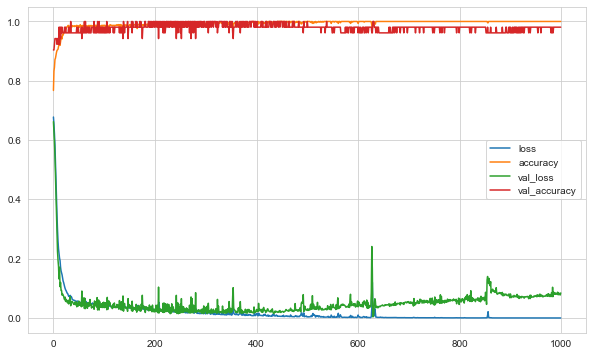

In [35]:
loss_df.plot();

In [36]:
model.evaluate(X_test, y_test, verbose=0)

[0.8843797445297241, 0.8947368264198303]

In [37]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.8843797445297241
accuracy :  0.8947368264198303


In [38]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.94      0.89      0.91        36

    accuracy                           0.89        57
   macro avg       0.88      0.90      0.89        57
weighted avg       0.90      0.89      0.90        57



### EarlyStopping

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [41]:
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

In [42]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 1s 13ms/step - loss: 0.6778 - accuracy: 0.7674 - val_loss: 0.6622 - val_accuracy: 0.9038
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.8326 - val_loss: 0.6296 - val_accuracy: 0.9038
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6204 - accuracy: 0.8457 - val_loss: 0.5931 - val_accuracy: 0.9231
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.8717 - val_loss: 0.5448 - val_accuracy: 0.9423
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.8761 - val_loss: 0.4792 - val_accuracy: 0.9423
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.8870 - val_loss: 0.4088 - val_accuracy: 0.9423
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8957 - val_loss: 0.3341 - val_accuracy: 0.9423
Epoch

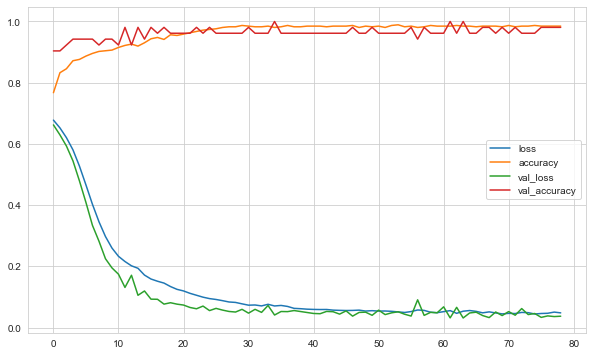

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.12801720201969147
accuracy :  0.9473684430122375


In [46]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



### learning_rate

In [47]:
from tensorflow.keras.optimizers import Adam

In [48]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [49]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [50]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 1s 14ms/step - loss: 0.6293 - accuracy: 0.8022 - val_loss: 0.5245 - val_accuracy: 0.9231
Epoch 2/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4337 - accuracy: 0.8978 - val_loss: 0.2717 - val_accuracy: 0.9231
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.2418 - accuracy: 0.9174 - val_loss: 0.1158 - val_accuracy: 0.9615
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.1680 - accuracy: 0.9196 - val_loss: 0.0763 - val_accuracy: 0.9808
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.1679 - accuracy: 0.9304 - val_loss: 0.0586 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.9565 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9630 - val_loss: 0.0625 - val_accuracy: 0.9615
Epoch

<AxesSubplot:>

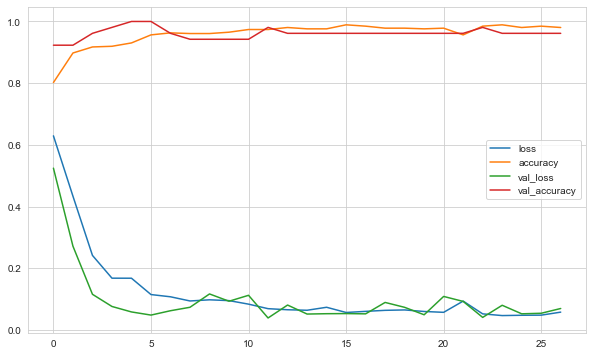

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [52]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.12057707458734512
accuracy :  0.9473684430122375


In [53]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [54]:
from tensorflow.keras.layers import Dropout

In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [56]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
15/15 [==============================] - 1s 13ms/step - loss: 0.7003 - accuracy: 0.4913 - val_loss: 0.6870 - val_accuracy: 0.5962
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.6043 - val_loss: 0.6850 - val_accuracy: 0.5385
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6766 - accuracy: 0.6217 - val_loss: 0.6816 - val_accuracy: 0.5385
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.6543 - val_loss: 0.6743 - val_accuracy: 0.5385
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.6500 - val_loss: 0.6635 - val_accuracy: 0.6154
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.6848 - val_loss: 0.6502 - val_accuracy: 0.6538
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.7174 - val_loss: 0.6271 - val_accuracy: 0.8654
Epoch

<AxesSubplot:>

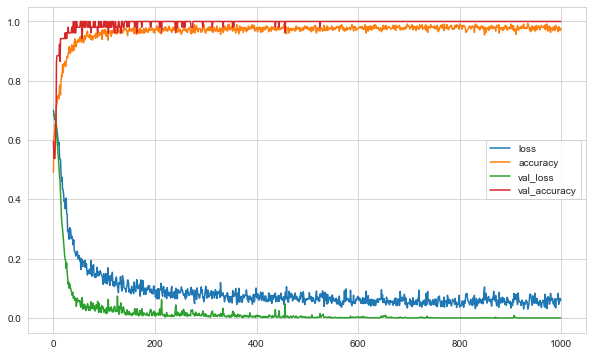

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.1692621260881424
accuracy :  0.9473684430122375


In [59]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [60]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [61]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [62]:
classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

,test_accuracy,test_precision,test_recall,test_f1
1,0.942,0.967,0.935,0.951
2,1.000,1.000,1.000,1.000
3,0.980,0.972,1.000,0.986
4,1.000,1.000,1.000,1.000
5,0.902,0.892,0.971,0.930
6,0.961,0.971,0.971,0.971
7,0.980,0.971,1.000,0.985
8,1.000,1.000,1.000,1.000
9,1.000,1.000,1.000,1.000
10,0.961,0.926,1.000,0.962


In [63]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.973,0.032
pre,0.970,0.036
rec,0.988,0.022
f1,0.978,0.025


## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [64]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [65]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [66]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [67]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
15/15 [==============================] - 1s 13ms/step - loss: 0.6778 - accuracy: 0.7674 - val_loss: 0.6622 - val_accuracy: 0.9038
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.8326 - val_loss: 0.6296 - val_accuracy: 0.9038
Epoch 3/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6204 - accuracy: 0.8457 - val_loss: 0.5931 - val_accuracy: 0.9231
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.8717 - val_loss: 0.5448 - val_accuracy: 0.9423
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 0.5275 - accuracy: 0.8761 - val_loss: 0.4792 - val_accuracy: 0.9423
Epoch 6/200
15/15 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.8870 - val_loss: 0.4088 - val_accuracy: 0.9423
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.4028 - accuracy

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000196569B0088>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [68]:
grid_model.best_score_

0.9746229260935143

In [69]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.001,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [70]:
#grid_model.cv_results_

In [71]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.975,0.025,1,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
23,0.975,0.021,1,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
15,0.973,0.022,3,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
3,0.971,0.022,4,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
5,0.971,0.027,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
12,0.969,0.026,6,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
20,0.969,0.025,6,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
16,0.969,0.034,6,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
11,0.969,0.031,6,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
19,0.967,0.021,10,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."


Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [72]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

### for keras models

In [73]:
#plot_roc_curve(model, X_test, y_test); # it gives an error because of the Sequential model

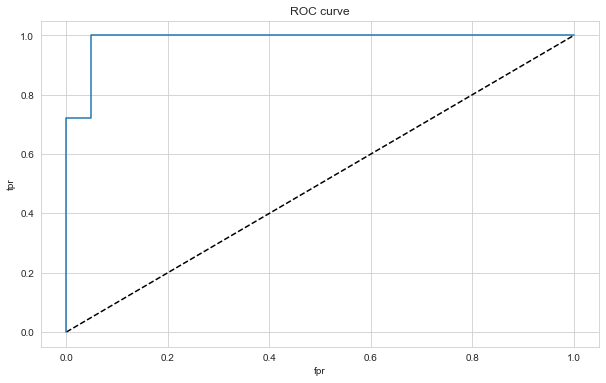

In [74]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [75]:
roc_auc_score(y_test, y_pred_proba)

0.9867724867724867

### for gridsearchcv model

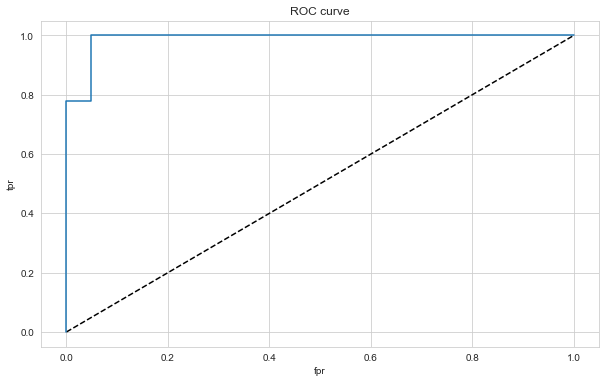

In [76]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [77]:
roc_auc_score(y_test, y_pred_proba)

0.9894179894179893

## Saving Final Model and Scaler

In [78]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [79]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [80]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [81]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
16/16 [==============================] - 1s 12ms/step - loss: 0.6777 - accuracy: 0.7480 - val_loss: 0.6615 - val_accuracy: 0.8772
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.8281 - val_loss: 0.6291 - val_accuracy: 0.9474
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6122 - accuracy: 0.8809 - val_loss: 0.5865 - val_accuracy: 0.9649
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.5632 - accuracy: 0.8867 - val_loss: 0.5298 - val_accuracy: 0.9649
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.4993 - accuracy: 0.8867 - val_loss: 0.4559 - val_accuracy: 0.9825
Epoch 6/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.8867 - val_loss: 0.3815 - val_accuracy: 0.9825
Epoch 7/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3606 - accuracy: 0.8965 - val_loss: 0.3147 - val_accuracy: 0.9649
Epoch

<AxesSubplot:>

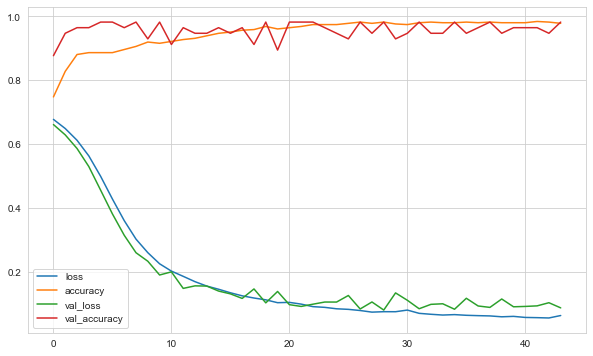

In [82]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [83]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.08040450513362885
accuracy :  0.9824561476707458


In [84]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



In [85]:
model.save('model_cancer.h5')

## Loading Model and Scaler

In [86]:
from tensorflow.keras.models import load_model

In [87]:
model_cancer = load_model('model_cancer.h5')
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [88]:
single_patient = df.drop('Cancer', axis = 1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


In [89]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[0.52103744, 0.0226581 , 0.68000973, 0.7920373 , 0.70313964,
        0.73111332, 0.68636364, 0.60551811, 0.35614702, 0.12046941,
        0.15929565, 0.35139844, 0.13568182, 0.30062512, 0.31164518,
        0.18304244, 0.62077552, 0.14152452, 0.61828432, 0.61929156,
        0.56861022, 0.91202749, 0.59846245, 0.41886396]])

In [90]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")
#model_cancer.predict_classes(single_patient)

array([[0]])

In [91]:
df["Cancer"].iloc[0]

0

## Comparison with ML

### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57

